In [ ]:
# setup fastbook
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
# import fastbook and fastai
from fastbook import *
from fastai.vision.widgets import *

In [5]:
path = untar_data(URLs.PETS)

In [6]:
fnames = get_image_files(path/'images')
fnames[:5]

(#5) [Path('/root/.fastai/data/oxford-iiit-pet/images/pug_6.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_198.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_163.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_69.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_120.jpg')]

In [7]:
corrupt = verify_images(fnames)

In [8]:
corrupt

(#0) []

In [9]:
corrupt.map(Path.unlink);

In [32]:
files = fnames
pat = r'^(.*)_\d+.jpg'

In [35]:
sz = 128
bs = 64

In [38]:
data = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

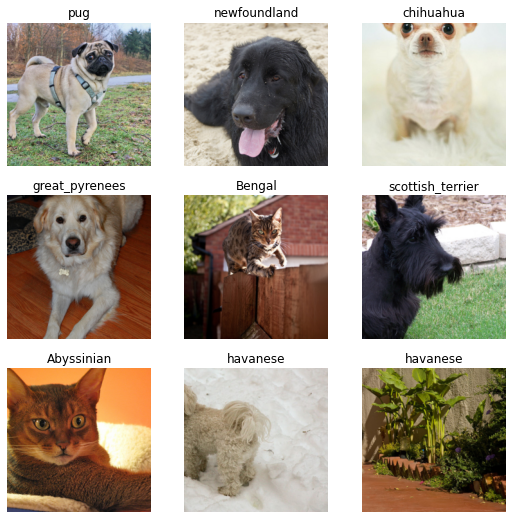

In [41]:
data.show_batch()

In [43]:
from fastai.metrics import accuracy
res_fine_model = cnn_learner(data, models.resnet50, metrics=accuracy)

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.0006918309954926372)

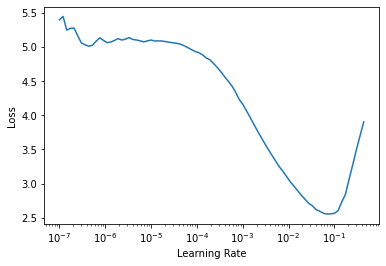

In [44]:
res_fine_model.lr_find()

In [49]:
res_fine_model.fit_one_cycle(4, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.893888,2.221232,0.596752,01:29
1,0.910703,0.865162,0.787551,01:30
2,0.498971,0.316229,0.911367,01:29
3,0.256340,0.261738,0.920839,01:30


In [50]:
res_fine_model.save('stage-1')

Path('/root/.fastai/data/oxford-iiit-pet/models/stage-1.pth')

In [51]:
res_fine_model.unfreeze()

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=6.309573450380412e-07)

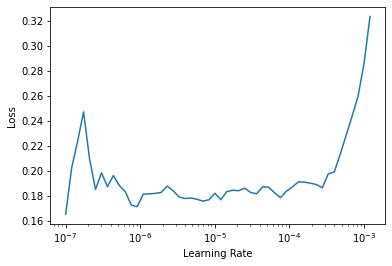

In [52]:
res_fine_model.lr_find()

In [58]:
res_fine_model.fit_one_cycle(4, lr_max=slice(1e-6,1e-4))learn.predict(files[1])

epoch,train_loss,valid_loss,accuracy,time
0,0.177653,0.258022,0.923545,01:51
1,0.154457,0.261243,0.926252,01:51
2,0.124837,0.255967,0.924899,01:51
3,0.106444,0.257874,0.924222,01:51


In [59]:
res_fine_model.save('stage-2')

Path('/root/.fastai/data/oxford-iiit-pet/models/stage-2.pth')

In [82]:
res_fine_model.predict(files[1])

('german_shorthaired',
 tensor(20),
 tensor([2.9185e-06, 1.9677e-06, 2.4899e-07, 1.3856e-05, 5.8731e-05, 6.4922e-06, 4.4129e-08, 4.6523e-06, 1.1545e-07, 2.5465e-05, 2.7733e-08, 8.3671e-08, 6.0088e-05, 4.5491e-02, 1.9782e-05, 1.2815e-03,
         2.2862e-04, 1.9724e-06, 1.1729e-06, 4.6235e-05, 9.5053e-01, 1.7402e-06, 8.3654e-08, 5.7492e-07, 1.6633e-07, 9.2644e-06, 1.4529e-03, 2.7995e-05, 5.4260e-07, 2.5791e-04, 9.8427e-07, 3.0646e-07,
         1.5449e-07, 3.7121e-07, 4.6013e-04, 3.8726e-07, 1.3263e-05]))

In [62]:
print(type(files[1]))

<class 'fastcore.foundation.L'>


In [66]:
interp = ClassificationInterpretation.from_learner(res_fine_model)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

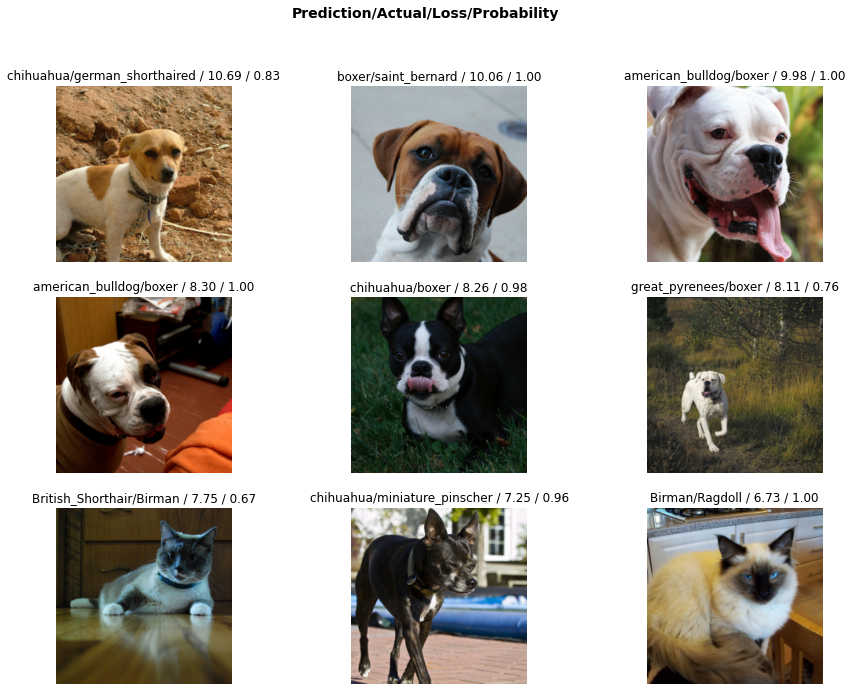

In [67]:
interp.plot_top_losses(9, figsize=(15,11))

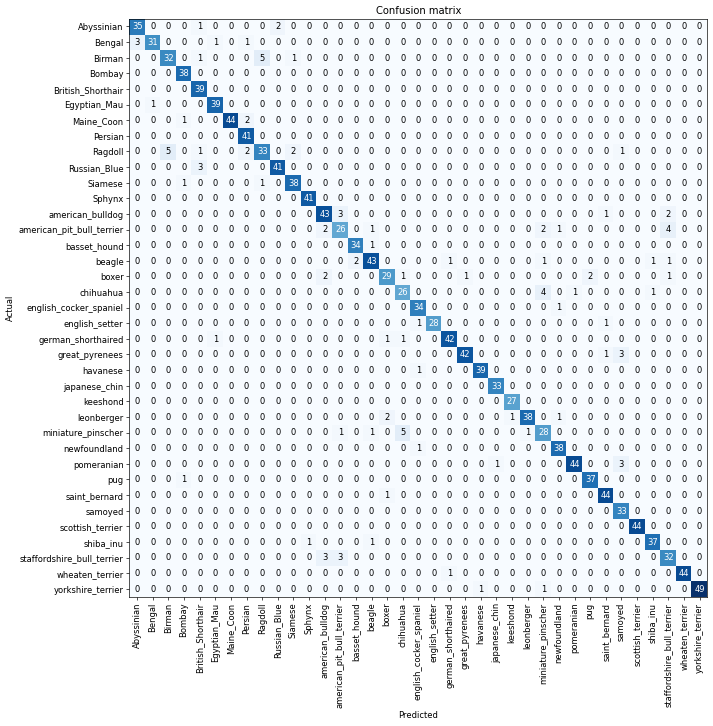

In [68]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [76]:
interp.most_confused(min_val=2)

[('Birman', 'Ragdoll', 5),
 ('Ragdoll', 'Birman', 5),
 ('miniature_pinscher', 'chihuahua', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('great_pyrenees', 'samoyed', 3),
 ('pomeranian', 'samoyed', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Ragdoll', 'Persian', 2),
 ('Ragdoll', 'Siamese', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('boxer', 'pug', 2),
 ('leonberger', 'boxer', 2)]

In [83]:
model = res_fine_model

In [94]:
model_x = res_fine_model

In [95]:
model_x.predict(files[1])

('german_shorthaired',
 tensor(20),
 tensor([2.9185e-06, 1.9677e-06, 2.4899e-07, 1.3856e-05, 5.8731e-05, 6.4922e-06, 4.4129e-08, 4.6523e-06, 1.1545e-07, 2.5465e-05, 2.7733e-08, 8.3671e-08, 6.0088e-05, 4.5491e-02, 1.9782e-05, 1.2815e-03,
         2.2862e-04, 1.9724e-06, 1.1729e-06, 4.6235e-05, 9.5053e-01, 1.7402e-06, 8.3654e-08, 5.7492e-07, 1.6633e-07, 9.2644e-06, 1.4529e-03, 2.7995e-05, 5.4260e-07, 2.5791e-04, 9.8427e-07, 3.0646e-07,
         1.5449e-07, 3.7121e-07, 4.6013e-04, 3.8726e-07, 1.3263e-05]))

In [85]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [114]:
model.path = Path('/content/gdrive/ruhacks')

In [115]:
model.path

Path('/content/gdrive/MyDrive/Google_CoLab/ruhacks')

In [105]:
model.export('breeds_classifcation_ruhacks.pkl')

In [116]:

res_fine_model.export()

path = Path()
# path.ls(file_exts='.pkl')

In [6]:
path = Path('/content/gdrive/ruhacks')

In [7]:
model_export = load_learner(path/'export.pkl')

In [9]:
model_export.predict('/content/gdrive/ruhacks/saint_bern.png')

('american_pit_bull_terrier',
 tensor(13),
 tensor([2.4787e-06, 3.4472e-04, 1.2161e-05, 3.6402e-05, 2.0117e-05, 3.6668e-04, 3.1240e-04, 4.9424e-03, 3.0874e-06, 1.1961e-06, 1.8010e-05, 2.9167e-07, 3.7280e-04, 3.6666e-01, 6.0869e-04, 6.2994e-05,
         1.6712e-02, 1.0835e-04, 5.9375e-03, 1.6016e-02, 1.2621e-04, 9.7229e-03, 1.9900e-05, 8.8436e-05, 2.3818e-06, 2.0673e-01, 6.9864e-06, 1.7892e-02, 9.5473e-06, 1.8690e-02, 3.3288e-01, 6.5996e-06,
         1.2450e-06, 3.6615e-06, 6.6145e-04, 3.4399e-04, 2.7256e-04]))

In [125]:
model_export.predict('/content/gdrive/ruhacks/german_shorthair.jpg')

('german_shorthaired',
 tensor(20),
 tensor([6.3141e-10, 2.7008e-07, 1.5841e-11, 7.1850e-08, 3.4166e-09, 1.5828e-05, 8.8314e-09, 7.6219e-08, 2.2663e-10, 2.4085e-07, 3.2668e-11, 9.3179e-09, 1.6061e-09, 5.3040e-03, 1.5013e-08, 1.1159e-06,
         9.1936e-09, 1.5562e-08, 3.5054e-06, 7.2591e-06, 9.9466e-01, 1.1653e-08, 2.3451e-10, 1.1240e-09, 4.3487e-09, 1.4526e-08, 3.0673e-06, 6.2604e-08, 3.7308e-09, 2.5376e-07, 1.2130e-10, 3.7121e-11,
         4.1754e-08, 7.1787e-11, 3.3416e-07, 1.0919e-08, 1.3392e-07]))